## Q1.

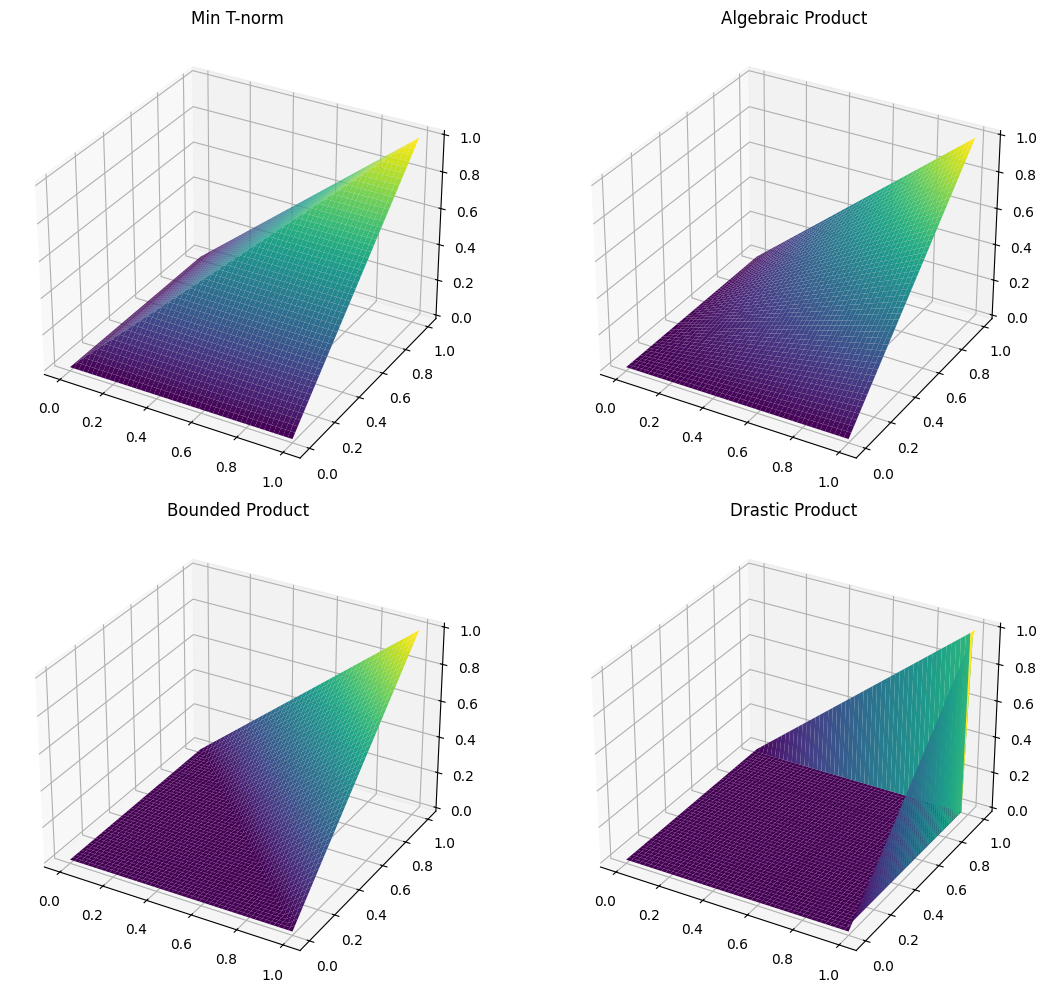

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------
# T-Norm Functions
# -------------------------------

def t_min(x, y):
    return np.minimum(x, y)

def t_algebraic_product(x, y):
    return np.multiply(x, y)

def t_bounded_product(x, y):
    return np.maximum(0, x + y - 1)

def t_drastic_product(x, y):
    result = np.zeros_like(x)
    result[x == 1] = y[x == 1]
    result[y == 1] = x[y == 1]
    return result

# -------------------------------
# Generate grid for plotting
# -------------------------------
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

# Apply T-norms
Z_min = t_min(X, Y)
Z_alg = t_algebraic_product(X, Y)
Z_bound = t_bounded_product(X, Y)
Z_drastic = t_drastic_product(X, Y)

# -------------------------------
# Plotting
# -------------------------------
fig = plt.figure(figsize=(12, 10))

# Min T-norm
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, Z_min, cmap='viridis')
ax1.set_title("Min T-norm")

# Algebraic Product
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, Z_alg, cmap='viridis')
ax2.set_title("Algebraic Product")

# Bounded Product
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, Z_bound, cmap='viridis')
ax3.set_title("Bounded Product")

# Drastic Product
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, Z_drastic, cmap='viridis')
ax4.set_title("Drastic Product")

plt.tight_layout()
plt.show()


## Q2.

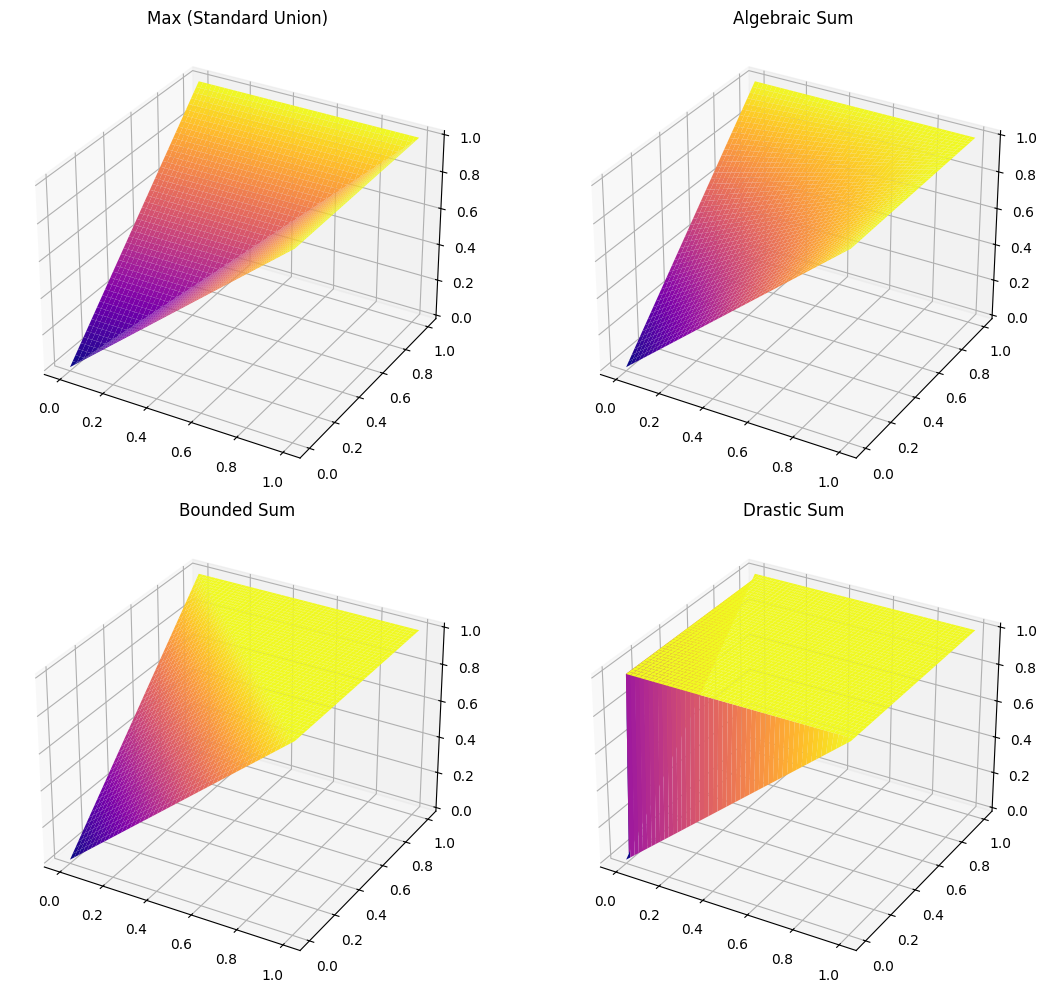

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# S-Norm Functions (T-conorms)
# -------------------------------

def s_max(x, y):
    return np.maximum(x, y)

def s_algebraic_sum(x, y):
    return x + y - (x * y)

def s_bounded_sum(x, y):
    return np.minimum(1, x + y)

def s_drastic_sum(x, y):
    result = np.ones_like(x)
    result[x == 0] = y[x == 0]
    result[y == 0] = x[y == 0]
    return result

# -------------------------------
# Generate grid for plotting
# -------------------------------
x = np.linspace(0, 1, 50)
y = np.linspace(0, 1, 50)
X, Y = np.meshgrid(x, y)

# Apply S-norms
Z_max = s_max(X, Y)
Z_alg = s_algebraic_sum(X, Y)
Z_bound = s_bounded_sum(X, Y)
Z_drastic = s_drastic_sum(X, Y)

# -------------------------------
# Plotting
# -------------------------------
fig = plt.figure(figsize=(12, 10))

# Max
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot_surface(X, Y, Z_max, cmap='plasma')
ax1.set_title("Max (Standard Union)")

# Algebraic Sum
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot_surface(X, Y, Z_alg, cmap='plasma')
ax2.set_title("Algebraic Sum")

# Bounded Sum
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot_surface(X, Y, Z_bound, cmap='plasma')
ax3.set_title("Bounded Sum")

# Drastic Sum
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot_surface(X, Y, Z_drastic, cmap='plasma')
ax4.set_title("Drastic Sum")

plt.tight_layout()
plt.show()


## Q3.

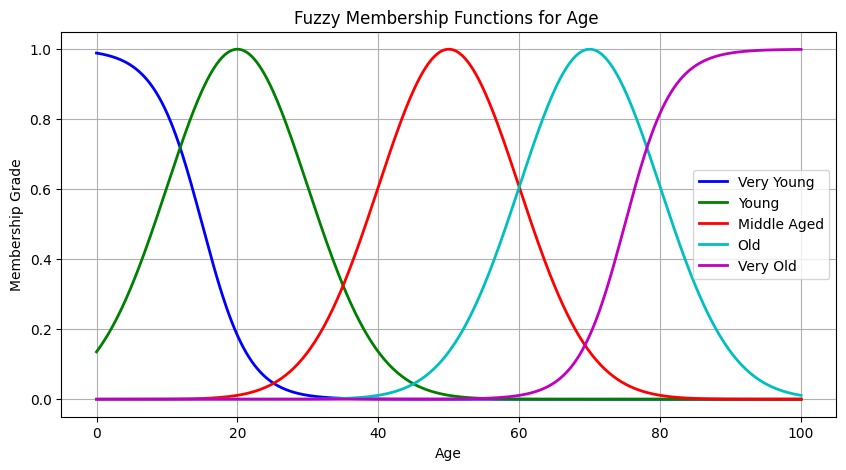

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid MF
def sigmf(x, a, c):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-a * (x - c)))

# Gaussian MF
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Universe of discourse
x_age = np.linspace(0, 100, 500)

# Membership functions 
very_young = 1 - sigmf(x_age, 0.3, 15)       # decreasing sigmoid
young = gaussmf(x_age, 20, 10)               # bell-shaped
middle_aged = gaussmf(x_age, 50, 10)         # bell-shaped
old = gaussmf(x_age, 70, 10)                 # bell-shaped
very_old = sigmf(x_age, 0.3, 75)             # increasing sigmoid

# Plot
plt.figure(figsize=(10,5))
plt.plot(x_age, very_young, 'b', linewidth=2, label="Very Young")
plt.plot(x_age, young, 'g', linewidth=2, label="Young")
plt.plot(x_age, middle_aged, 'r', linewidth=2, label="Middle Aged")
plt.plot(x_age, old, 'c', linewidth=2, label="Old")
plt.plot(x_age, very_old, 'm', linewidth=2, label="Very Old")

plt.title("Fuzzy Membership Functions for Age ")
plt.xlabel("Age")
plt.ylabel("Membership Grade")
plt.legend()
plt.grid(True)
plt.show()


## Q4.

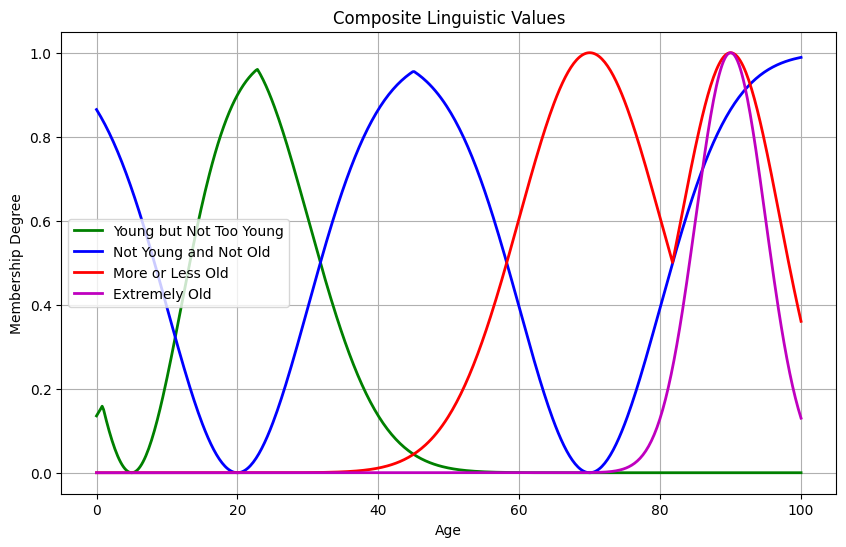

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian MF
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Universe
x_age = np.linspace(0, 100, 500)

# Basic smooth sets
very_young = gaussmf(x_age, 5, 7)
young = gaussmf(x_age, 20, 10)
middle_aged = gaussmf(x_age, 50, 10)
old = gaussmf(x_age, 70, 10)
very_old = gaussmf(x_age, 90, 7)

# Composite sets
young_but_not_too_young = np.minimum(young, 1 - very_young)
not_young_and_not_old = np.minimum(1 - young, 1 - old)
more_or_less_old = np.maximum(old, very_old)
extremely_old = very_old ** 2   # sharpened for "extremely"

# Plot
plt.figure(figsize=(10,6))
plt.plot(x_age, young_but_not_too_young, 'g', linewidth=2, label="Young but Not Too Young")
plt.plot(x_age, not_young_and_not_old, 'b', linewidth=2, label="Not Young and Not Old")
plt.plot(x_age, more_or_less_old, 'r', linewidth=2, label="More or Less Old")
plt.plot(x_age, extremely_old, 'm', linewidth=2, label="Extremely Old")

plt.title("Composite Linguistic Values")
plt.xlabel("Age")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid(True)
plt.show()


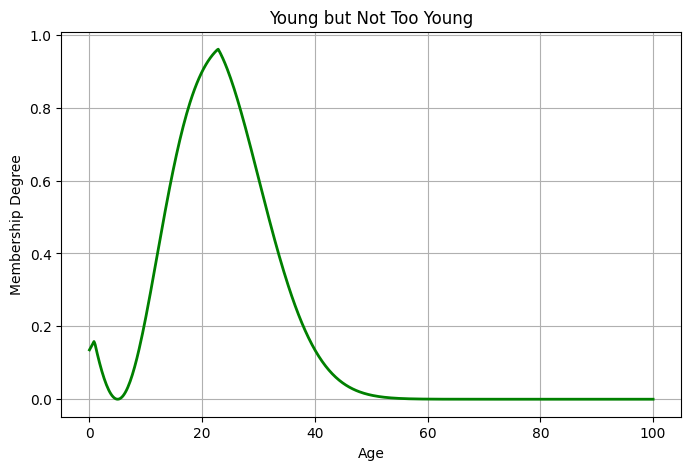

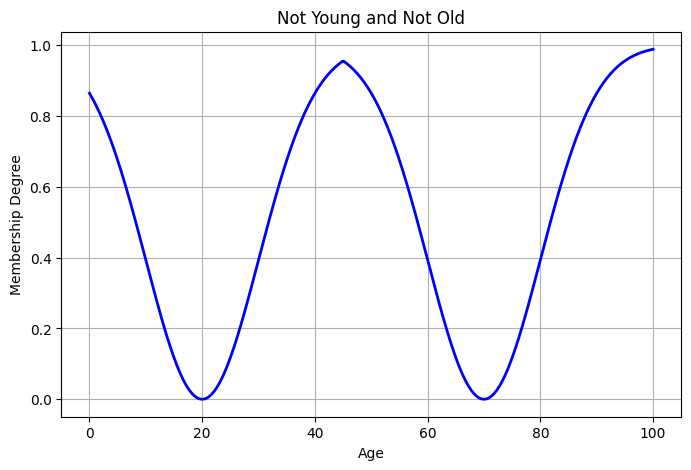

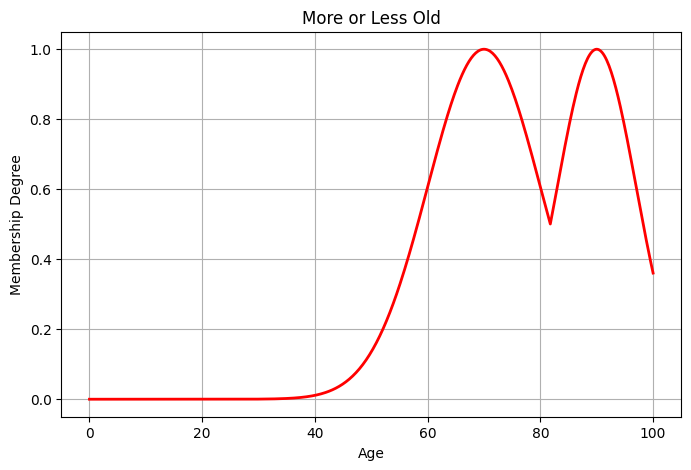

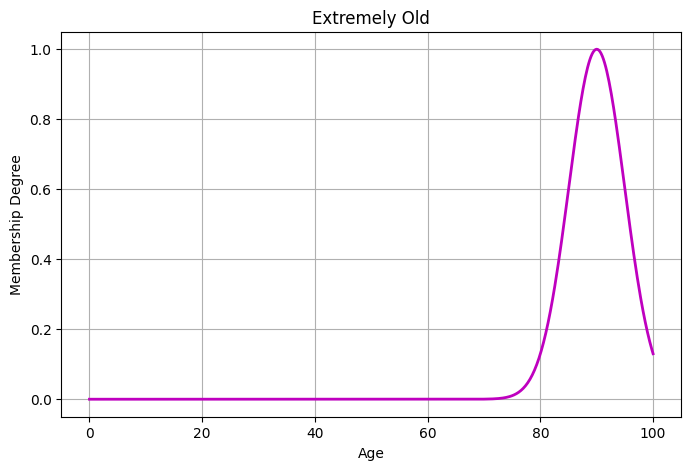

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian MF
def gaussmf(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Universe
x_age = np.linspace(0, 100, 500)

# Basic smooth sets
very_young = gaussmf(x_age, 5, 7)
young = gaussmf(x_age, 20, 10)
middle_aged = gaussmf(x_age, 50, 10)
old = gaussmf(x_age, 70, 10)
very_old = gaussmf(x_age, 90, 7)

# Composite sets
young_but_not_too_young = np.minimum(young, 1 - very_young)
not_young_and_not_old = np.minimum(1 - young, 1 - old)
more_or_less_old = np.maximum(old, very_old)
extremely_old = very_old ** 2   # sharpened for "extremely"

# Create a list of data and labels
composites = [
    (young_but_not_too_young, "Young but Not Too Young", 'g'),
    (not_young_and_not_old, "Not Young and Not Old", 'b'),
    (more_or_less_old, "More or Less Old", 'r'),
    (extremely_old, "Extremely Old", 'm')
]

# Plot each in a separate figure
for data, title, color in composites:
    plt.figure(figsize=(8,5))
    plt.plot(x_age, data, color, linewidth=2)
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Membership Degree")
    plt.grid(True)
    plt.show()